# 2. Importing, Manipulating, and Writing Point Clouds

The most basic operations of LiDAR analysis involve importing and inspecting tiles of LiDAR data. This sample demonstrates basic file input, plotting, filtering and output using `pyfor`. Two major filetypes are supported, `.las` and `.ply`. `.las` files are the de facto standard for aerial LiDAR data acquisitions. `.ply` files are a bit more obscure, but are produced by image matching software, generally produced from drone imagery. Due to the obscurity of `.ply` files, this chapter will focus exclusively on `.las` files. Most of the functionality described in the coming chapters applies to both file types.

## Importing Point Clouds

In [24]:
import pyfor

The first step after importing in most workflows is to instantiate a `Cloud` object. This can be done by calling the `cloud.Cloud` class on a `.las` or `.laz` file path. The instance of the Cloud class holds all methods and data related to the raw point cloud, some of which we will explore below.

In [15]:
tile = pyfor.cloud.Cloud("../data/test.las")

Once we have an instance of our `Cloud` object we can explore some information regarding the point cloud. We can print the Cloud object for a brief summary of the data within.

In [16]:
print(tile)

 File Path: ../data/test.las
File Size: 6082545
Number of Points: 217222
Minimum (x y z): [405000.01, 3276300.01, 36.29]
Maximum (x y z): [405199.99, 3276499.99, 61.12]
Las Version: 1.3
                
                


An important attribute of all `Cloud` objects is `.data`. This represents the raw data and header information of a `Cloud` object. It is managed by a separate, internal class called `LASData` in the case of `.las` files and `PLYData` in the case of `.ply` files. These classes manage some monotonous reading, writing and updating tasks for us, and are generally not necessary to interact with directly. Still, it is important to know they exist. We can access some important information from the `LASData` header attribute, for example.

In [17]:
tile.data.header.min

[405000.01, 3276300.01, 36.29]

The point cloud itself is organized in a `pandas` dataframe. This can be accessed using the `Cloud.data.points` attribute. Those familiar with the `pandas` package will be right at home here.

In [18]:
tile.data.points.head()

,x,y,z,intensity,return_num,classification,flag_byte,scan_angle_rank,user_data,pt_src_id
0,405120.99,3276300.01,53.05,0,1,5,81,15,149,11
1,405120.29,3276300.04,52.36,0,1,5,73,15,143,11
2,405119.94,3276300.09,53.00,0,1,5,73,15,150,11
3,405117.94,3276300.04,47.46,0,1,5,73,15,93,11
4,405118.21,3276300.12,50.32,0,1,5,73,15,121,11


We can use any `pandas` functionality from this data frame that we desire. If we want to examine the distribution of the `z` dimension, we can do so:

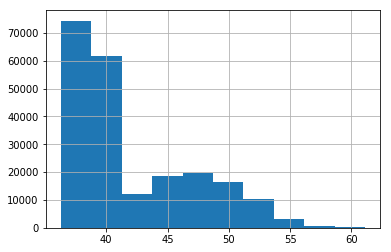

In [20]:
tile.data.points["z"].hist()

## Filtering Points

Point clouds can be filtered along any dimension. As a reminder, we can find a list of the dimensions using pandas functionality:

In [21]:
list(tile.data.points)

['x',
 'y',
 'z',
 'intensity',
 'return_num',
 'classification',
 'flag_byte',
 'scan_angle_rank',
 'user_data',
 'pt_src_id']

To filter we use the `.filter()` method of a cloud object. We must provide a dimension and the bounds owe wish to filter. Note that this modifies the cloud object **in place**.

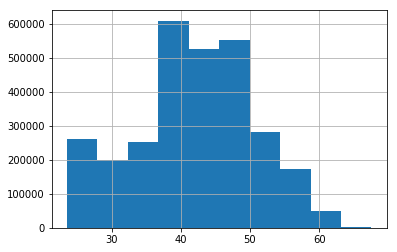

In [9]:
tile.filter(min=0, max=70, dim="z")
tile.data.points["z"].hist()

## Plotting the Point Cloud

This is all fine and good, but what about point cloud visualization? There are many options for this in pyfor. The most basic plot is a 2 dimensional canopy height model using the `.plot` method of our `tile`.

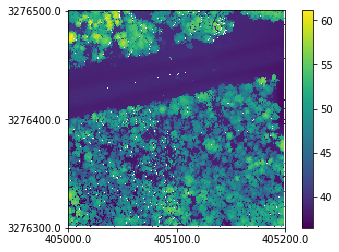

In [25]:
tile.plot()

## Writing to File

Now that we have modified our tile by removing outliers in the Z dimension, we want to save our work. This is done with the `.write` method.

In [ ]:
tile.write("filtered_tile.las")